**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [6]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [7]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [8]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [9]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [10]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [11]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [12]:
# Answer here

# 1.Run with same model with my own prompt
# my own prompt
inputPrompt = ["Explain the concept of Data mining."]
text_response, logs = prompt_gemini(input_prompt = inputPrompt, with_tokens_info = True)
print("logs:", logs)
display(Markdown(text_response))

logs: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 14, 'output_tokens': 921}


Let's break down the concept of **Data Mining**.

In its simplest form, data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. Think of it like sifting through a mountain of raw information to find valuable nuggets of gold.

Here's a more detailed explanation:

**The Core Idea:**

We live in an age of "big data." Businesses, organizations, and even individuals generate vast amounts of information every day. This data, in its raw form, can be overwhelming and difficult to understand. Data mining provides the tools and techniques to make sense of this data, extract meaningful information, and use it to make better decisions, predict future trends, and solve complex problems.

**Key Components and Processes:**

Data mining isn't a single, magical step. It's a multi-stage process that typically involves:

1.  **Data Collection:** Gathering data from various sources (databases, logs, sensors, social media, etc.).
2.  **Data Cleaning and Preprocessing:** This is a crucial and often time-consuming step. It involves:
    *   **Handling missing values:** Deciding how to deal with incomplete data.
    *   **Removing noise and outliers:** Identifying and correcting errors or unusual data points.
    *   **Data transformation:** Converting data into a suitable format for analysis (e.g., normalizing values, creating new features).
    *   **Data integration:** Combining data from different sources.
3.  **Data Selection:** Choosing the relevant data subsets for the specific analysis.
4.  **Data Mining (Pattern Discovery):** This is where the actual algorithms are applied to find patterns. This can involve various techniques (explained below).
5.  **Pattern Evaluation:** Assessing the discovered patterns to determine their usefulness, novelty, and validity. Not all patterns are interesting or actionable.
6.  **Knowledge Representation:** Presenting the discovered knowledge in a way that is understandable and usable by humans (e.g., reports, visualizations, predictive models).

**Common Data Mining Tasks/Techniques:**

Data mining employs a variety of techniques to achieve its goals. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes.
    *   *Example:* Predicting whether a customer will click on an advertisement (yes/no), or classifying emails as spam or not spam.
*   **Clustering:** Grouping similar data points together without predefined classes.
    *   *Example:* Segmenting customers into different groups based on their purchasing behavior for targeted marketing.
*   **Association Rule Mining (Market Basket Analysis):** Discovering relationships between items in a dataset.
    *   *Example:* "Customers who buy bread also tend to buy milk." This is famously used in retail to understand product co-occurrence.
*   **Regression:** Predicting a continuous numerical value.
    *   *Example:* Predicting the price of a house based on its features, or forecasting sales figures.
*   **Anomaly Detection (Outlier Detection):** Identifying unusual data points that deviate significantly from the norm.
    *   *Example:* Detecting fraudulent credit card transactions or identifying network intrusions.
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time.
    *   *Example:* Understanding the typical steps a customer takes before making a purchase online.
*   **Summarization:** Providing a concise overview of a dataset.
    *   *Example:* Generating reports on key performance indicators.

**Why is Data Mining Important?**

Data mining offers significant benefits across various industries:

*   **Business Intelligence:** Understanding customer behavior, market trends, and operational efficiency.
*   **Marketing:** Targeted advertising, customer segmentation, and personalized recommendations.
*   **Finance:** Fraud detection, risk assessment, and credit scoring.
*   **Healthcare:** Disease prediction, drug discovery, and personalized treatment plans.
*   **Science and Research:** Discovering new scientific insights and patterns in complex data.
*   **E-commerce:** Recommending products, optimizing website design, and preventing churn.
*   **Government:** Identifying patterns in crime, optimizing resource allocation, and detecting fraud.

**In essence, data mining transforms raw data into actionable intelligence. It's about finding the "so what?" in your data, enabling organizations to make informed decisions, gain a competitive edge, and drive innovation.**

In [13]:
# 2.Run with a different model
# different model
different_model_name = "gemini-2.5-pro"
text_response, logs = prompt_gemini(input_prompt = inputPrompt,model_name=different_model_name ,with_tokens_info = True)
print("logs:", logs)
display(Markdown(text_response))

logs: {'model': 'gemini-2.5-pro', 'input_tokens': 14, 'output_tokens': 1320}


Of course! Let's break down the concept of Data Mining in a clear and simple way.

### The Core Idea: A Simple Analogy

Imagine you're a modern-day gold miner. But instead of digging through mountains of rock, you're sifting through mountains of data.

*   **The Mountain:** This is your massive dataset—sales records, website clicks, customer feedback, sensor readings, etc.
*   **The Tools:** These are the data mining algorithms and techniques.
*   **The Gold:** These are the valuable, hidden patterns, trends, and insights that you uncover.

In short:

> **Data mining is the process of automatically discovering useful patterns and knowledge from large amounts of data.**

It's not about retrieving a specific piece of information (like looking up a customer's address). It's about finding relationships and trends you didn't even know existed.

---

### How is it Different from a Standard Database Query?

This is a key distinction.

*   **A Database Query (Information Retrieval):** You ask a direct question and get a direct answer.
    *   *Example:* "Show me all the customers from New York who bought a laptop last month."

*   **Data Mining (Pattern Discovery):** You ask the system to find interesting relationships on its own.
    *   *Example:* "Find the common characteristics of customers who are most likely to stop using our service next month."

Data mining helps you answer questions you might not have thought to ask.

---

### The Data Mining Process (A Simplified View)

Data mining isn't just running a single program. It's a multi-step process, often called **Knowledge Discovery in Databases (KDD)**.

1.  **Business Understanding:** What problem are we trying to solve? Do we want to increase sales, reduce fraud, or predict customer behavior? The goal must be clear.

2.  **Data Selection & Cleaning (Preprocessing):** This is the most time-consuming step. Raw data is often messy. This involves:
    *   Gathering the right data.
    *   Handling missing values (e.g., a customer with no age listed).
    *   Removing duplicate or incorrect records.
    *   Formatting the data so it can be analyzed.
    *   *(This step is crucial. The principle "garbage in, garbage out" applies perfectly here.)*

3.  **Data Transformation:** Converting the data into a suitable format for mining. This might involve summarizing data or creating new variables from existing ones.

4.  **Data Mining (The "Magic" Step):** This is where algorithms are applied to the prepared data to identify patterns. This is the core of the process where you choose a specific technique (more on this below).

5.  **Pattern Evaluation & Interpretation:** Are the patterns found actually interesting and useful? A data analyst or business expert reviews the results to see if they make sense and provide real value. A pattern might be statistically significant but commercially useless.

6.  **Deployment:** The discovered knowledge is put into action. This could mean creating a new marketing campaign, building a recommendation engine for a website, or developing a new fraud detection alert system.

---

### Common Data Mining Techniques & Tasks

Here are the most common things you can do with data mining, with simple examples:

#### 1. Association Rule Mining (Market Basket Analysis)
*   **What it does:** Finds relationships between items in a dataset.
*   **Question it answers:** "What items are frequently bought together?"
*   **Classic Example:** A supermarket discovers that customers who buy diapers also have a high probability of buying beer. This insight could lead them to place beer near the diaper aisle to increase sales.

#### 2. Classification
*   **What it does:** Assigns items to predefined categories or classes.
*   **Question it answers:** "Is this email spam or not spam?" or "Will this customer renew their subscription or not?"
*   **Classic Example:** An email service uses an algorithm that looks at the words, sender, and other features of an email to classify it as either `Spam` or `Not Spam`.

#### 3. Clustering
*   **What it does:** Groups similar items together without any predefined categories. The algorithm finds the natural groupings in the data.
*   **Question it answers:** "Can we segment our customers into distinct groups based on their purchasing behavior?"
*   **Classic Example:** A marketing team uses clustering to identify different customer segments (e.g., "high-spending loyalists," "bargain hunters," "new customers"). They can then target each group with different marketing strategies.

#### 4. Regression
*   **What it does:** Predicts a continuous numerical value (like a price or temperature).
*   **Question it answers:** "What will the price of this house be based on its size, location, and age?"
*   **Classic Example:** A real estate website predicts housing prices based on features like square footage, number of bedrooms, and neighborhood data.

#### 5. Anomaly (or Outlier) Detection
*   **What it does:** Identifies data points that are significantly different from the rest.
*   **Question it answers:** "Is this credit card transaction fraudulent?"
*   **Classic Example:** A bank's system flags a transaction as potentially fraudulent because it's a large purchase made in a different country from where the cardholder usually shops.

---

### Real-World Applications

Data mining is everywhere:

*   **Retail & E-commerce:** Amazon's "Customers who bought this also bought..." feature.
*   **Streaming Services:** Netflix and Spotify recommending movies and music based on your viewing/listening history.
*   **Banking & Finance:** Detecting fraudulent credit card transactions and assessing credit risk for loans.
*   **Healthcare:** Predicting which patients are at high risk for certain diseases based on their medical history and lifestyle.
*   **Marketing:** Identifying which customers are most likely to respond to a new advertising campaign.

In summary, **data mining is the art and science of turning large quantities of raw data into actionable intelligence.** It empowers businesses and organizations to make smarter, data-driven decisions.

### 3.Discuss the differences on the results with different models.

根據比較上述兩種model的結果，使用gemini-2.5-pro會跑比較久，但產出的回答比原先使用gemini-2.5-flash-lite更詳細且內容豐富，字數也比較多。

In [14]:
# 4.change different system instruction
# different system instruction
# use gemini-flash-lite
differentSysInstruction = "you are a cat."
text_response, logs = prompt_gemini(input_prompt = inputPrompt, system_instruction=differentSysInstruction,with_tokens_info = True)
print("logs:", logs)
display(Markdown(text_response))

logs: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 14, 'output_tokens': 665}


*Stretches languidly, tail twitching.*

Ah, data mining. You humans and your peculiar ways of looking at things. For us cats, it's much simpler.

Imagine a giant, overflowing box of kibble. *Purrrr.* So much kibble! And you, the human, want to find the *best* kibble. The one that makes my whiskers twitch with delight, the one that has that perfect crunch.

**Data mining is like me, the cat, sniffing through that giant box of kibble.**

I don't just eat randomly, you see. I have a system.

*   **I sniff around.** I get a general sense of what's in the box. Is it all the same flavor? Are there little bits of something else mixed in? This is like looking at all the data you have. You see the big picture.

*   **I paw at things.** I might nudge a few pieces, see how they feel. Are they hard? Soft? This is like looking for patterns. Are there groups of kibble that feel similar?

*   **I taste a few.** *Mrow!* This is the crucial part. I take a little nibble. Does it taste good? Does it make me want more? This is where you find the valuable bits. You're looking for what's *interesting*, what's *useful*.

*   **I might even bury a particularly good piece for later.** *Purrrr.* That's like making a prediction. You find something good, and you want to be able to find it again, or know when you'll find more like it.

So, for you humans, instead of kibble, you have... *information*. Lots and lots of information. And you want to find the *good stuff* in it. The hidden treasures.

*   **You're looking for patterns:** Like how certain types of kibble always seem to be near the crunchy ones. Or how the salmon-flavored ones are always in the corner.
*   **You're looking for relationships:** Like how if I eat the salmon kibble, I'm more likely to want a nap afterwards.
*   **You're looking for anomalies:** Like that one piece of kibble that smells... *wrong*. You want to know why it's different.
*   **You're looking for predictions:** Like, "If the human puts out this kind of kibble, I'll be happy for the next hour."

You use fancy tools, I'm sure. Computers and algorithms. But at its heart, it's just about **finding the hidden gems in a mountain of stuff.** It's about understanding what's *really* going on, not just what you see on the surface.

*Yawns, showing off tiny fangs.*

It's about making sense of the world, one sniff, one paw, one taste at a time. Now, if you'll excuse me, I believe there's a sunbeam that requires my immediate attention. And perhaps a little nap. Data mining is tiring work, you know. *Purrrr.*

### 4.Discuss what would happen if you change the system prompt.
我把system intrusction改成you are a cat.來做實驗，根據與原先的結果比較，在cat角色下model回答是用貓的視角解釋，沒有固定的架構，而且會多出像貓的行為的詞。比起原先像教科書式的回答，cat版本的model少了許多專有名詞，資訊也不完整。不過這蠻有趣的，可以看出model能扮演不同的角色並呈現不同風格的回答。

---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [15]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [16]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [17]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [18]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [19]:
# Answer here
# 表示一隻貓的個性特徵
class PersonalityTrait(BaseModel):
    trait_name: str
    description: str

# 表示一隻貓可能的飲食資訊
class DietInfo(BaseModel):
    food_name: str
    frequency_per_week: int
    notes: str

# 最終貓咪資料結構
class CatProfile(BaseModel):
    name: str
    breed: str
    average_lifespan: str
    personality: list[PersonalityTrait]
    recommended_diet: list[DietInfo]

# 讓model提供貓咪的詳細資料
input_prompt = [
    "Generate a detailed cat profile about the British Shorthair cat. "
    "Fill all fields in the schema. Provide realistic and informative descriptions."]

text_response = prompt_gemini(
    input_prompt=input_prompt,
    schema=CatProfile 
)

print(text_response)

{
  "name": "British Shorthair",
  "breed": "British Shorthair",
  "average_lifespan": "15-20 years",
  "personality": [
    {
      "trait_name": "Calm and Easygoing",
      "description": "British Shorthairs are known for their placid and relaxed nature. They are not overly demanding and are content to entertain themselves or simply observe their surroundings."
    },
    {
      "trait_name": "Affectionate but Independent",
      "description": "While they enjoy human company and can be quite cuddly, they are not typically lap cats who need constant attention. They appreciate affection on their own terms."
    },
    {
      "trait_name": "Playful",
      "description": "Despite their calm demeanor, they retain a playful streak, especially as kittens. They enjoy interactive toys and gentle play sessions."
    },
    {
      "trait_name": "Intelligent",
      "description": "They are smart cats that can learn routines and even some tricks. They are observant and often figure things o

---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [20]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [21]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [22]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [23]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w", encoding="utf-8") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [24]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to results\info_extractions\review_extraction_example.jsonl: 1 docs [00:00, 1003.90 docs/s]

✓ Saved 1 documents to results\info_extractions\review_extraction_example.jsonl



LangExtract: Loading results\info_extractions\review_extraction_example.jsonl: 100%|█████████▉| 8.58k/8.58k [00:00<00:00, 591kB/s]

✓ Loaded 1 documents from results\info_extractions\review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [25]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r",encoding="utf-8") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [26]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [27]:
# Answer here
# 下載Now You See Me: Now You Don't的影評
# read data
pdf_path = "./data/documents/'The Running Man,' a new 'New You See Me' and 'Jay Kelly' are in theaters _ NPR.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/'The Running Man,' a new 'New You See Me' and 'Jay Kelly' are in theaters _ NPR.pdf'


In [28]:
print(formatted_text)

**Page 1**
"""
HOURLY NEWS
LISTEN LIVE
MY PLAYLIST
REVIEW
DONATE
What to Watch
'The Running Man,' a new 'Now You See Me,' and George
Clooney are in theaters
NOVEMBER 14, 2025 · 11:38 AM ET
By Bob Mondello, Linda Holmes
Dave Franco as Jack Wilder, Jesse
Eisenberg as Daniel Atlas, and Isla
Fisher as Henley Reeves in Now You
See Me: Now You Don't.
Katalin Vermes/Lionsgate
There's yet another Now You See Me in theaters
this weekend, along with yet another Stephen
King adaptation. George Clooney plays a
charming Hollywood star in Jay Kelly, while a
warm, funny and goosebump-raising
documentary streams on Apple TV. Here's what to
watch.
Now You See Me, Now You Don't
In theaters Friday 
Now You See Me: Now You Don’t (2025) - Final Trailer
Now You See Me: Now You Don’t (2025) - Final Trailer
NPR 24 Hour Program Stream
On Air Now
2025/11/20 中午12:45
'The Running Man,' a new 'New You See Me' and 'Jay Kelly' are in theaters : NPR
https://www.npr.org/2025/11/14/nx-s1-5604279/the-running-man-stephen

In [29]:
# 沿用之前定義的prompt和examples
html_content = grounded_info_extraction(
    formatted_text,
    prompt,
    examples,
    file_name="dune_review_extraction"
)

Extracted 7 entities:

• opinion_statement: 'magic-centric rob-from-the-rich-give-to-the-poor heist franchise'
  - subject: The franchise
  - sentiment: Positive
  - key_phrase: magic-centric rob-from-the-rich-give-to-the-poor heist
• opinion_statement: 'where the earlier films seemed to want you to believe the on-screen magicians were pulling off their tricks, this one mostly settles for CGI and cinematic trickery'
  - subject: The film
  - sentiment: Negative
  - key_phrase: mostly settles for CGI and cinematic trickery
• opinion_statement: 'even card tricks fall slightly flat'
  - subject: Card tricks
  - sentiment: Negative
  - key_phrase: fall slightly flat
• opinion_statement: 'Eisenberg's prickly snark is still fun'
  - subject: Eisenberg's snark
  - sentiment: Positive
  - key_phrase: prickly snark is still fun
• opinion_statement: 'the tricks getting less convincing'
  - subject: The tricks
  - sentiment: Negative
  - key_phrase: less convincing
• opinion_statement: 'the scrip

LangExtract: Saving to results\info_extractions\dune_review_extraction.jsonl: 1 docs [00:00, 1001.03 docs/s]

✓ Saved 1 documents to results\info_extractions\dune_review_extraction.jsonl



LangExtract: Loading results\info_extractions\dune_review_extraction.jsonl: 100%|█████████▉| 5.36k/5.36k [00:00<00:00, 357kB/s]

✓ Loaded 1 documents from results\info_extractions\dune_review_extraction.jsonl
✓ Visualization saved to ./results/info_extractions/dune_review_extraction_vis.html


In [30]:
html_content

### Discussion
我下載了Rotten Tomato中對Now You See Me: Now You Don't的review，並沿用上述的程式碼及prompt、example，有辨識出6個評論內容，細看每個情緒分類其實都有被正確標記，這顯示model能透過prompt及example對大部分的情緒分析做得不錯。而且能在許多混雜的資訊中完整捕捉到需要分析的語句，也展現出model不太需要經過太複雜的fine-tuning也可以精確的完成任務。

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [31]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [32]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


C:\Users\user\AppData\Local\Temp\ipykernel_18220\2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
C:\Users\user\AppData\Local\Temp\ipykernel_18220\2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [33]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [34]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [35]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [36]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [37]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [38]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
437,10437,@jwolfie_ why you gotta use the dark skin emoji,anger,0.479,"[values=[0.0091718165, 0.005029388, -0.0157745...","[0.0091718165, 0.005029388, -0.015774582, -0.0..."
593,10593,Some bloke on the train who's obviously trying...,anger,0.434,"[values=[-0.031390868, 9.003723e-05, 0.0082212...","[-0.031390868, 9.003723e-05, 0.008221259, -0.0..."
401,10401,@PatVPeters @FreeBeacon Quite the response of ...,anger,0.500,"[values=[0.0011249523, 0.011870044, -0.0028151...","[0.0011249523, 0.011870044, -0.0028151039, -0...."
500,10500,@paulbushnell25 @EE bad news if ordered online...,anger,0.458,"[values=[0.027782101, -0.016085112, 0.00104111...","[0.027782101, -0.016085112, 0.001041118, -0.06..."
351,10351,@TillTheEndMMVI I accidetly dumped boiling wat...,anger,0.521,"[values=[0.0056815357, -0.012723545, 0.0017087...","[0.0056815357, -0.012723545, 0.0017087933, -0...."
...,...,...,...,...,...,...
3374,40547,All this doom and gloom! We scored from open p...,sadness,0.375,"[values=[0.009830676, 0.009769855, 0.018427314...","[0.009830676, 0.009769855, 0.018427314, -0.078..."
3370,40543,Floofel.i wonder if your mother knows how dark...,sadness,0.375,"[values=[-0.016143877, 0.017471693, 0.01507706...","[-0.016143877, 0.017471693, 0.015077066, -0.08..."
3508,40681,@darryella it doesn't chip and it doesn't get ...,sadness,0.271,"[values=[0.0027988928, 0.006205642, -0.0187634...","[0.0027988928, 0.006205642, -0.018763408, -0.0..."
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083,"[values=[-0.02371569, -0.043580692, 0.02761431...","[-0.02371569, -0.043580692, 0.027614318, -0.09..."


In [39]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
219,30848,"Ready for that nice, breezy, calm, sunshine we...",joy,0.583,"[values=[0.0020740312, -0.023727704, -0.016465...","[0.0020740312, -0.023727704, -0.016465494, -0...."
117,21180,The 2nd step to beating #anxiety or #depressio...,fear,0.479,"[values=[0.023471452, -0.010988598, 0.02061124...","[0.023471452, -0.010988598, 0.020611243, -0.04..."
76,10933,(Sam) Brown's Law: Never offend people with st...,anger,0.333,"[values=[0.017159522, -0.0068402686, -0.008005...","[0.017159522, -0.0068402686, -0.008005174, -0...."
197,30826,@tomderivan73 😁...I'll just people watch and e...,joy,0.438,"[values=[-0.0028830545, -0.019134942, -0.00139...","[-0.0028830545, -0.019134942, -0.0013986382, -..."
70,10927,Sting is just too damn earnest for early morni...,anger,0.370,"[values=[-0.014882094, 0.0127369985, -0.016873...","[-0.014882094, 0.0127369985, -0.016873686, -0...."
337,40850,aaahhhh! a little @OtisRedding to soothe the s...,sadness,0.197,"[values=[-0.009578301, -0.006965374, -0.013988...","[-0.009578301, -0.006965374, -0.013988109, -0...."
114,21177,Okay. Brace yourself. I will attempt my first ...,fear,0.792,"[values=[-0.017778596, -0.011548954, 0.0031904...","[-0.017778596, -0.011548954, 0.0031904785, -0...."
283,40796,Public products: high downhearted price tag co...,sadness,0.354,"[values=[0.016449967, -0.037677467, 0.00111561...","[0.016449967, -0.037677467, 0.0011156169, -0.0..."
234,30863,@HunterDean_ [he gives a gleeful squeak and wr...,joy,0.729,"[values=[0.0040237773, 0.031236453, -0.0145491...","[0.0040237773, 0.031236453, -0.014549151, -0.0..."
42,10899,"Kik to trade, have fun or a conversation (kik...",anger,0.241,"[values=[-0.026761461, 0.019656219, -0.0002295...","[-0.026761461, 0.019656219, -0.00022959975, -0..."


In [40]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [41]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [42]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [43]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

c:\Users\user\114-1MLHW\DM2025-Lab2-Exercise-main\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [44]:
# Answer here
# 將n_components改成3
reducer_3d = umap.UMAP(n_components=3, metric='cosine', random_state=28)
embedding_3d = reducer_3d.fit_transform(X_embeddings)
# 畫圖
df_plot_3d = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot_3d['emotion'] = combined_df['emotion']
df_plot_3d['intensity'] = combined_df['intensity']
df_plot_3d['text'] = combined_df['text']

fig_3d = px.scatter_3d(
    df_plot_3d,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='emotion', 
    hover_data=['text', 'intensity'], 
    title='3D UMAP Projection of Text Embeddings'
)

fig_3d.show()

c:\Users\user\114-1MLHW\DM2025-Lab2-Exercise-main\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



### Discussion
比較2D UMAP及3D UMAP:

1. 不同:
    - 2D的點比較不緊密，3D的點會疊在一起，不好看出哪些類型較相近
    - 3D更立體，從UMAP3的維度可以看到顏色的分層，雖然還是都疊在一起，但可以看出紫色散佈在空間中，而其他顏色會各自聚集一起
    - 2D的點太散了，完全看不出來同樣顏色的點匯聚在一起
2. 相同:
    - 顏色上都一樣可以看到4種顏色
3. 總結:
    - 我覺得3個維度更能呈現更多資訊    

---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [45]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [46]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 190}


The key challenges in realizing AGI's full potential stem from its fundamental requirements and the ethical considerations surrounding its development. These include:

*   **Learning from Diverse Data:** Unlike narrow AI, which is trained on structured data, AGI needs to learn from a wide variety of unstructured data sources.
*   **Computational Power:** The sheer amount of computational resources needed to process and learn from these vast and diverse datasets presents a significant hurdle.
*   **Ethical Concerns:** Developing AGI responsibly requires addressing critical ethical issues such as:
    *   **Bias and Fairness:** Ensuring algorithms are unbiased and treat everyone equally by training on diverse datasets and continuously monitoring performance.
    *   **Privacy:** Prioritizing user data protection through robust privacy measures and transparent data usage policies.
    *   **Accountability:** Establishing clear guidelines and legal frameworks to determine responsibility for decisions made by AGI systems and address any harm caused.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [47]:
# Answer here
# 找一個網站
url_test = "https://medium.com/@troy801125/machine-learning-%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7%E5%92%8C%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E6%98%AF%E4%BB%80%E9%BA%BC-49a6ba41ab3e"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
# 改問題
result = rag_chain(question="What is machine learning?", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 717, 'output_tokens': 52}


Based on the provided text, machine learning is a key area of improvement that will contribute to the development of Artificial General Intelligence (AGI). The text mentions that "Progress towards AGI will depend on improvements in machine learning, computational power, and data availability."

### Discussion
我找了一個介紹機器學習的網站，網站內容包含了機器學習跟人工智慧的簡單介紹與應用及分類，但model只回答了文章大概的內容而已，並沒有根據網站內容詳細回答我的問題。

### Display
#### 網站內容
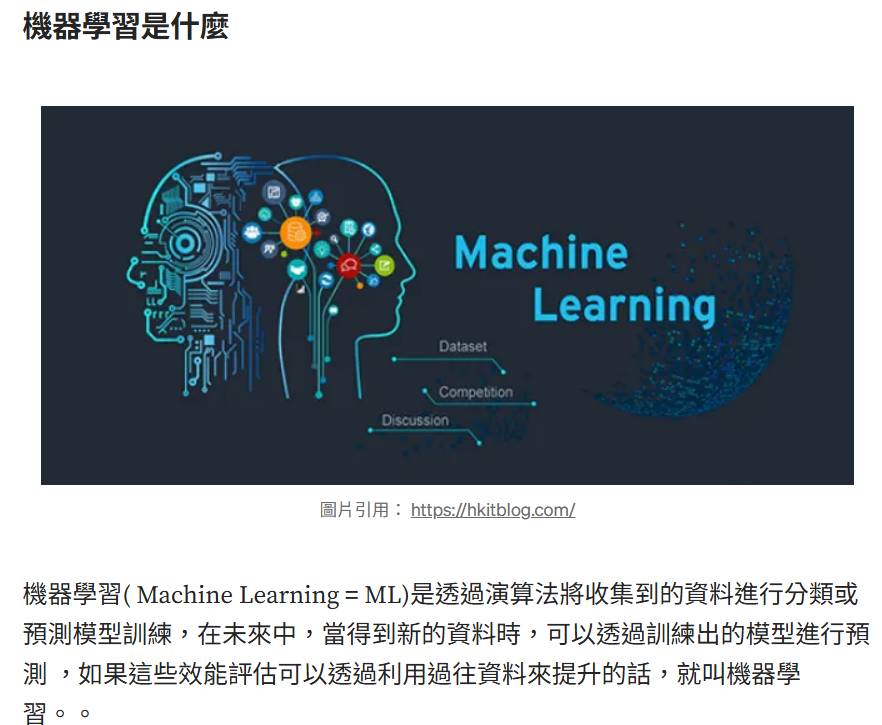
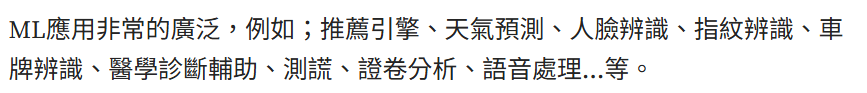
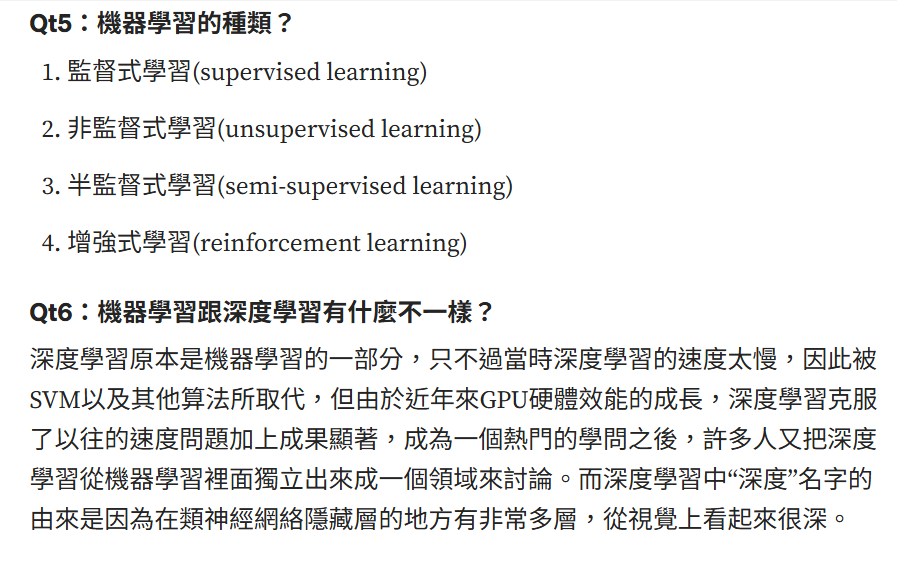

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [48]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  70%|███████   | 14/20 [00:10<00:04,  1.41it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 28.742905256s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:41<00:49,  9.88s/it]

Rate limit of 15 requests per minute reached. Waiting for 18.46 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:07,  1.26it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.90 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:10,  1.45it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.10 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.06 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:59<00:04,  1.23it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.28 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:52<00:00,  5.63s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 45.00%
              precision    recall  f1-score   support

       anger       0.32      0.30      0.31        20
        fear       0.83      0.25      0.38        20
         joy       0.45      0.90      0.60        20
     sadness       0.47      0.35      0.40        20

    accuracy                           0.45        80
   macro avg       0.52      0.45      0.42        80
weighted avg       0.52      0.45      0.42        80



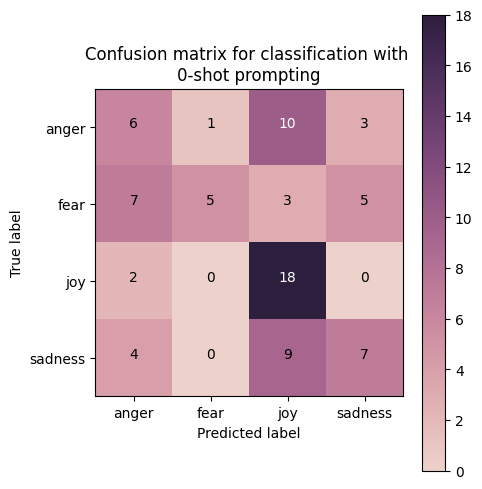

In [50]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @brian5or6 turn that shit off!   Home Button under Accessibility. \n\nWhen did innovation become mind fuckery? . #iphonePhoneHome
Class: anger

Text: in my dream....They were trying to steal my kidney!!! #nightmare #blackmarket #whydidiwatchthat
Class: fear

Text: It's not that the man did not know how to juggle, he just didn't have the balls to do it. \n#funny #pun #punny #lol #hilarious
Class: joy

Text: @TMobileHelp my service is down in Cleveland, OH. What's going on? #unhappy
Class: sadness




Processing samples for emotion: anger...:  55%|█████▌    | 11/20 [00:07<00:06,  1.46it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 26.913870206s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:41<00:19,  3.93s/it]

Rate limit of 15 requests per minute reached. Waiting for 18.82 seconds.


Processing samples for emotion: fear...:  35%|███▌      | 7/20 [00:04<00:08,  1.46it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 26.255100485s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:37<00:53,  5.33s/it]

Rate limit of 15 requests per minute reached. Waiting for 19.22 seconds.


Processing samples for emotion: joy...:  15%|█▌        | 3/20 [00:02<00:11,  1.51it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 25.828353646s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:33<02:05,  8.33s/it]

Rate limit of 15 requests per minute reached. Waiting for 19.83 seconds.


Processing samples for emotion: joy...:  95%|█████████▌| 19/20 [01:03<00:00,  1.34it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 24.483074418s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 19.28 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:29<00:03,  1.45it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.41 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:23<00:00,  4.17s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 51.25%
              precision    recall  f1-score   support

       anger       0.50      0.35      0.41        20
        fear       0.86      0.30      0.44        20
         joy       0.47      0.90      0.62        20
     sadness       0.48      0.50      0.49        20

    accuracy                           0.51        80
   macro avg       0.58      0.51      0.49        80
weighted avg       0.58      0.51      0.49        80



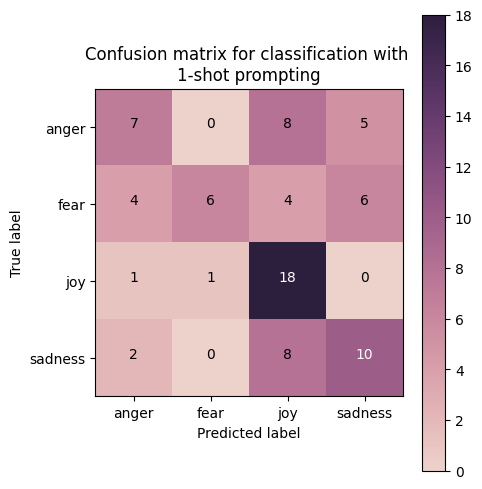

In [51]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @brian5or6 turn that shit off!   Home Button under Accessibility. \n\nWhen did innovation become mind fuckery? . #iphonePhoneHome
Class: anger

Text: @realDonaldTrump: No sense in taking out your wrath on innocent people because you think police shot an innocent man. #MakeAmericaSafeAgain
Class: anger

Text: @LonelyGoomba I wouldn't bring this up if I were you. It's a very touchy subject. And people get way to offended these days
Class: anger

Text: Candice's pout gets more preposterous by the week. This week it's gone a bit Jack Nicholson's Joker. #GBBO
Class: anger

Text: #firsttweetever sippin #hotchocolate wondering #why I finally gave in &lt;3 haha #hellloooootwitter - ...its because #facebookisforfamily #rage
Class: anger

Text: in my dream....They were trying to steal my kidney!!! #n

Processing samples for emotion: anger...:  55%|█████▌    | 11/20 [00:09<00:07,  1.15it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 20.789960551s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:28<00:12,  2.50s/it]

Rate limit of 15 requests per minute reached. Waiting for 31.94 seconds.


Processing samples for emotion: fear...:  35%|███▌      | 7/20 [00:05<00:10,  1.27it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 19.480027997s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:22<00:30,  3.02s/it]

Rate limit of 15 requests per minute reached. Waiting for 32.27 seconds.


Processing samples for emotion: joy...:  15%|█▌        | 3/20 [00:02<00:15,  1.08it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 18.463508661s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:19<01:08,  4.60s/it]

Rate limit of 15 requests per minute reached. Waiting for 31.95 seconds.


Processing samples for emotion: joy...:  95%|█████████▌| 19/20 [01:00<00:00,  1.10it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 20.456739981s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 34.63 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:46<00:03,  1.28it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.27 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:37<00:00,  4.89s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 53.75%
              precision    recall  f1-score   support

       anger       0.47      0.45      0.46        20
        fear       0.86      0.30      0.44        20
         joy       0.52      0.85      0.64        20
     sadness       0.52      0.55      0.54        20

    accuracy                           0.54        80
   macro avg       0.59      0.54      0.52        80
weighted avg       0.59      0.54      0.52        80



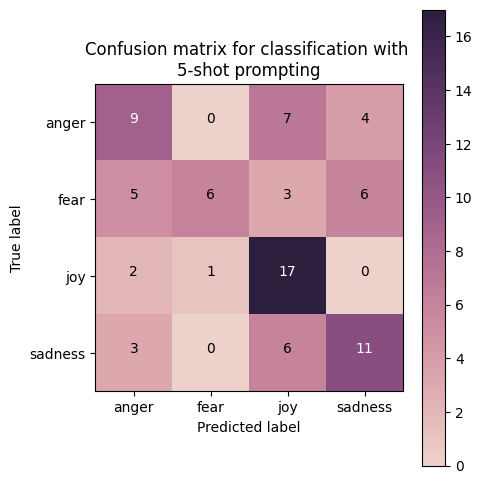

In [52]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
"""
0-shot prompting:總共有36個被正確分類，整體accuracy為45%
其中模型對於joy的分類效果最好，有18個被正確分類，F1-score也是所有分類最高的，
顯示模型對於joy的辨識能力較強。其他分類的表現較差，像是anger只有6個被正確分類，
而且anger有10個例子被分類到joy，可能在模型認知中ander的用詞與joy相似。

1-shot prompting:總共有41個被正確分類，整體accuracy為51%
其中模型對於joy的分類效果還是最好的，一樣有18個被正確分類，其他分類有些許進步，像是sadness原本
在0-shot是只有7個被正確分類，但經過1-shot後提升到10個被正確分類，而最差的分類還是anger。

5-shot prompting:總共有43個被正確分類，整體accuracy為54%
anger的分類有比較正確了，有9個被正確分類，比起0-shot和1-shot都有提升，而joy的分類還是最好的，
經過few-shot prompting後，整體分類表現有上升的趨勢。

總結:
我發現使用few-shot prompting並不一定會帶來整體準確率的提升，但對於一些原本表現比較不好的分類
有很多幫助，像是anger和sadness的分類都有所提升。不過fear這個分類不管怎麼調整prompting的方式，效果都不太好。
"""

'\n0-shot prompting:總共有43個被正確分類，整體accuracy為53.75%\n其中模型對於joy的分類效果最好，有17個被正確分類，F1-score也是所有分費最高的，而最差的的分類是fear。\n\n1-shot prompting:總共有48個被正確分類，整體accuracy為60%\n其中模型對於joy的分類效果還是最好的，一樣有17個被正確分類，其他分類有些許進步，像是sadness原本\n在0-shot是只有8個被正確分類，但經過1-shot後提升到11個被正確分類，而最差的分類還是fear。\n\n5-shot prompting:總共有45個被正確分類，整體accuracy為56.25%\n整體accuracy反而是稍微下降，不過在anger、joy、sadness的分類都有所提升。不過fear還是最差的，而且比原本的0-shot表現還差。\n\n總結:\n我發現使用few-shot prompting並不一定會帶來整體準確率的提升，但對於一些原本表現比較不好的分類\n有很多幫助，像是anger和sadness的分類都有所提升。不過fear這個分類不管怎麼調整prompting的方式，效果都不太好\n，中間使用1-shot prompting有稍微提升，但使用5-shot prompting反而變更差了，可能是因為提供的examples讓模型更混淆了。\n'

#### 0-shot prompting
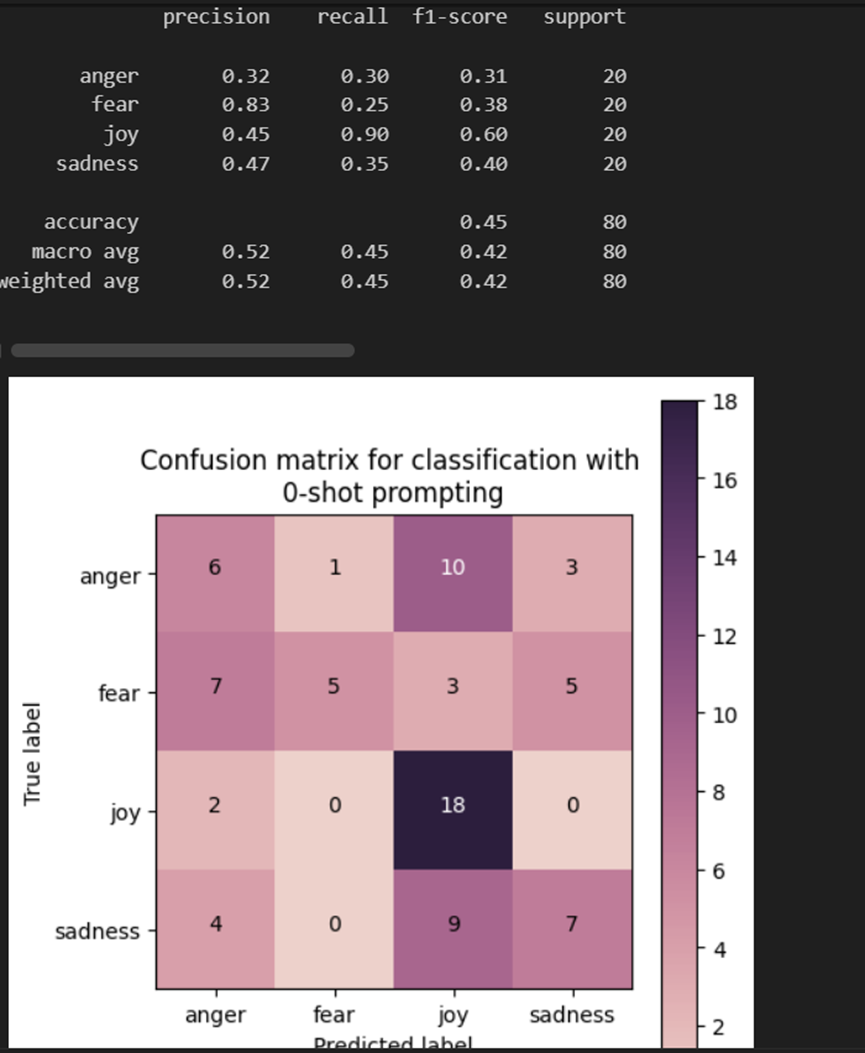
#### 1-shot prompting
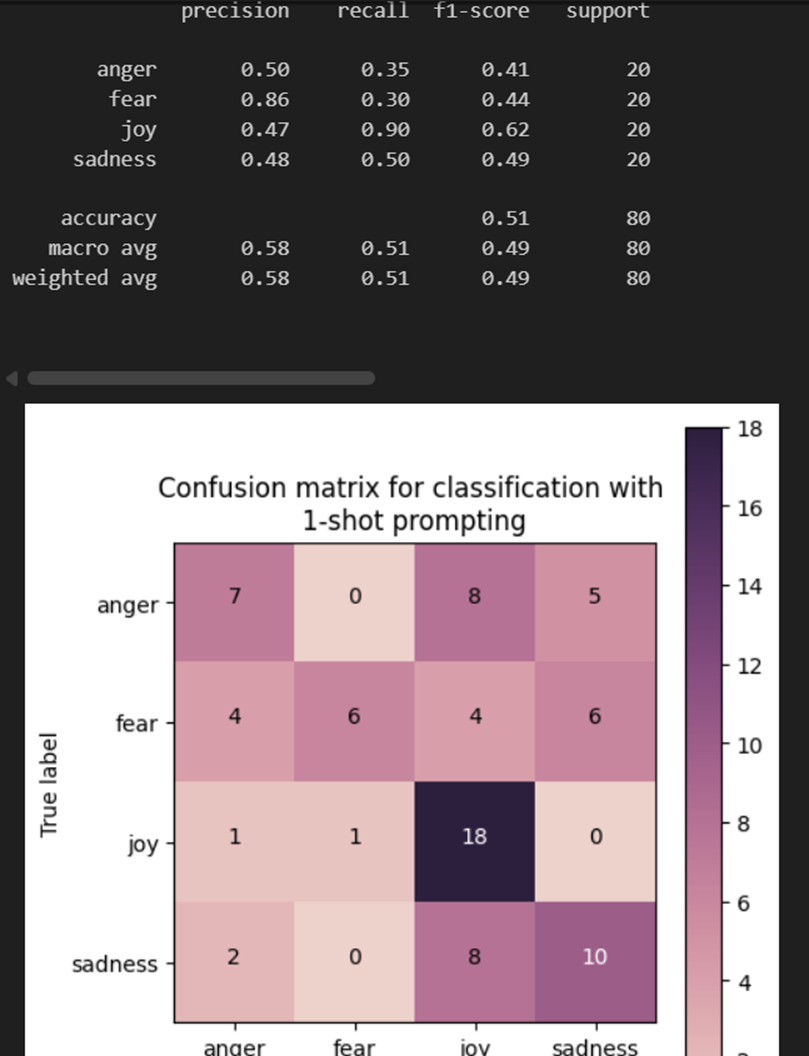
#### 5-shot pormpting
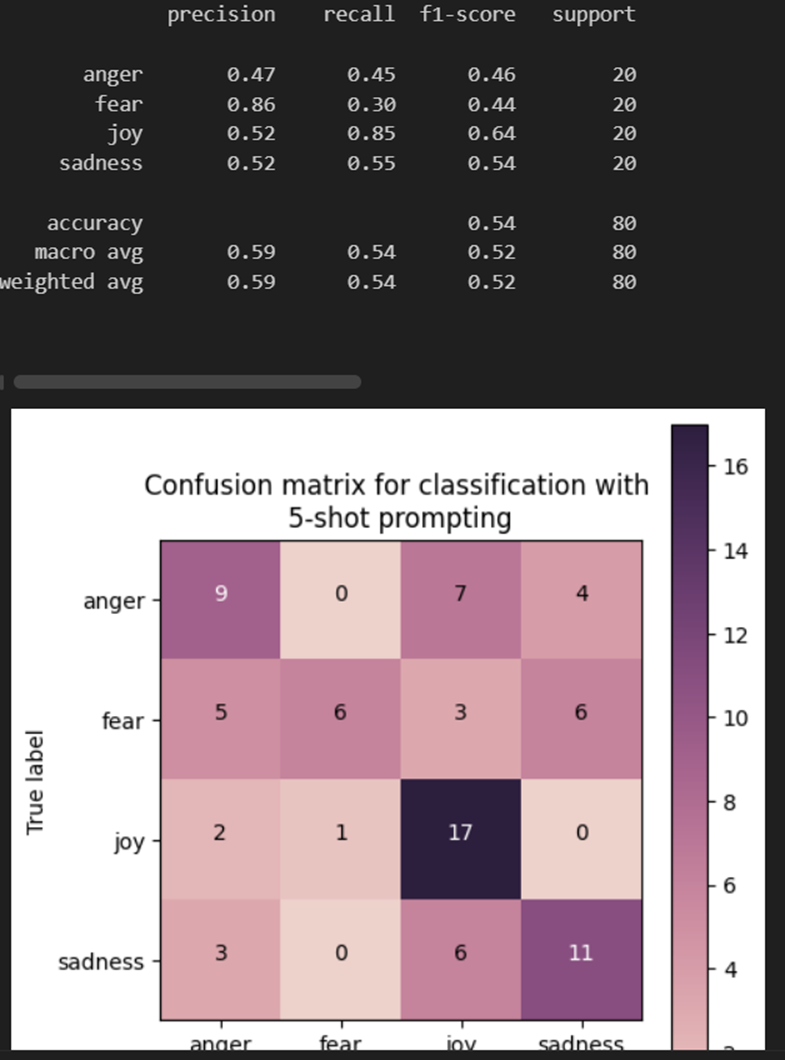

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [ ]:
import pandas as pd
import os

# 讀取檔案
base_dir = 'results/llm_classification_results'
suffixes = ['5', '1', '0']
file_names = [os.path.join(base_dir, f'results_samples_20_shots_{s}.csv') for s in suffixes]
emotion_suffixes = [f'_{s}' for s in suffixes]
allDf = []

for i in range(len(file_names)):
    resultDf = pd.read_csv(file_names[i])
    # 重新設定欄位名稱，後續合併才知道是來自哪個檔案
    resultDf = resultDf.rename(columns={'predicted_emotion': f'predicted_emotion{emotion_suffixes[i]}'})
    allDf.append(resultDf)

# 合併三個檔案
mergeDf = allDf[0].merge(allDf[1],on="text",how="left")\
    .merge(allDf[2],on="text",how="left")

mergeDf.to_csv('results/merged_emotions_comparison.csv', index=False, encoding='utf8')

In [ ]:
# 計算三次預測是否正確
for i in suffixes:
    mergeDf[f"correct_{i}"] = mergeDf["true_emotion"] == mergeDf[f"predicted_emotion_{i}"]

# 分類回答狀況
def classify_case(row):
    values = [row["correct_0"], row["correct_1"], row["correct_5"]]

    if values[0] == False and True in values[1:]:   # 只要1-shot或5-shot有正確就算改善
        return "Improved with examples"

    elif all(v == False for v in values):   # 都回答錯誤
        return "Always wrong"
    
    elif all(v == True for v in values):    # 都回答正確
        return "Always correct"

    elif values[0] == True and any(v == False for v in values[1:]): # 0-shot正確但1-shot或5-shot錯誤
        return "Got worse with examples"

    else:
        return "No clear change"    # 其他情況

mergeDf["category"] = mergeDf.apply(classify_case, axis=1)
print(mergeDf["category"].value_counts())
mergeDf.to_csv('results/merged_emotions_comparison_with_category.csv',
               index=False, encoding='utf8')


category
Always wrong               41
Always correct             35
Improved with examples      9
Got worse with examples     1
Name: count, dtype: int64


### Discussion
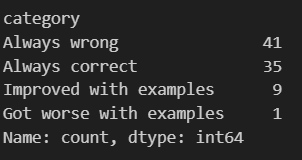

根據上述檢查，我發現經過few-shot prompting真正改善回答的只有9個例子，而且有1個例子是使用few-shot prompting是沒有進步的反而回答錯誤，而不受影響的共有76筆，約88%的資料。
雖然受到few-shot影響的不多，但大部分顯示few-shot的幫助是正面的，代表設計example的方向有符合這些預測資料，也顯示這幾個例子結構或用詞代表的情緒較模糊，需要參考來幫助判斷。
不過有將近一半的資料是"Always wrong"，這代表example提供的幫助有限，還是無法彌補模型本身的理解錯誤。

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---